In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvc2VyZ2UvcGFyYS8xX3Byb2plY3RzL2NvdXJzZV8zODUvMjRmLTM4NS93ZWIvbGVjdHVyZXMvd2VlazA4'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

{"/home/serge/miniforge3/envs/385f24/lib/python3.10/importlib/_bootstrap.py": 1710939701.8314817, "/home/serge/miniforge3/envs/385f24/lib/python3.10/importlib/_bootstrap_external.py": 1710939701.8314817, "/home/serge/miniforge3/envs/385f24/lib/python3.10/codecs.py": 1710939700.8154602, "/home/serge/miniforge3/envs/385f24/lib/python3.10/encodings/aliases.py": 1710939701.38347, "/home/serge/miniforge3/envs/385f24/lib/python3.10/encodings/__init__.py": 1710939701.4834716, "/home/serge/miniforge3/envs/385f24/lib/python3.10/encodings/utf_8.py": 1710939701.5874743, "/home/serge/miniforge3/envs/385f24/lib/python3.10/abc.py": 1710939700.7794595, "/home/serge/miniforge3/envs/385f24/lib/python3.10/io.py": 1710939700.8954616, "/home/serge/miniforge3/envs/385f24/lib/python3.10/stat.py": 1710939701.0194635, "/home/serge/miniforge3/envs/385f24/lib/python3.10/_collections_abc.py": 1710939700.8194602, "/home/serge/miniforge3/envs/385f24/lib/python3.10/genericpath.py": 1710939700.867461, "/home/serge/m

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import esda
import libpysal as lps
import contextily as cx

In [3]:
import seaborn as sns
sns.set_context('notebook')
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [4]:
scag = gpd.read_parquet("~/data/scag_region.parquet")

In [5]:
san_diego = scag[scag.geoid.str[:5]=='06073']

In [6]:
san_diego.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 627 entries, 158 to 4567
Columns: 194 entries, geoid to geometry
dtypes: float64(191), geometry(1), int64(1), object(1)
memory usage: 955.2+ KB


In [7]:
san_diego = san_diego.dropna(subset=['median_home_value'])

In [8]:
san_diego = san_diego.to_crs(epsg=3857)

(-13099175.999157175, -12913655.059545828, 3827188.049586126, 3968975.95342782)

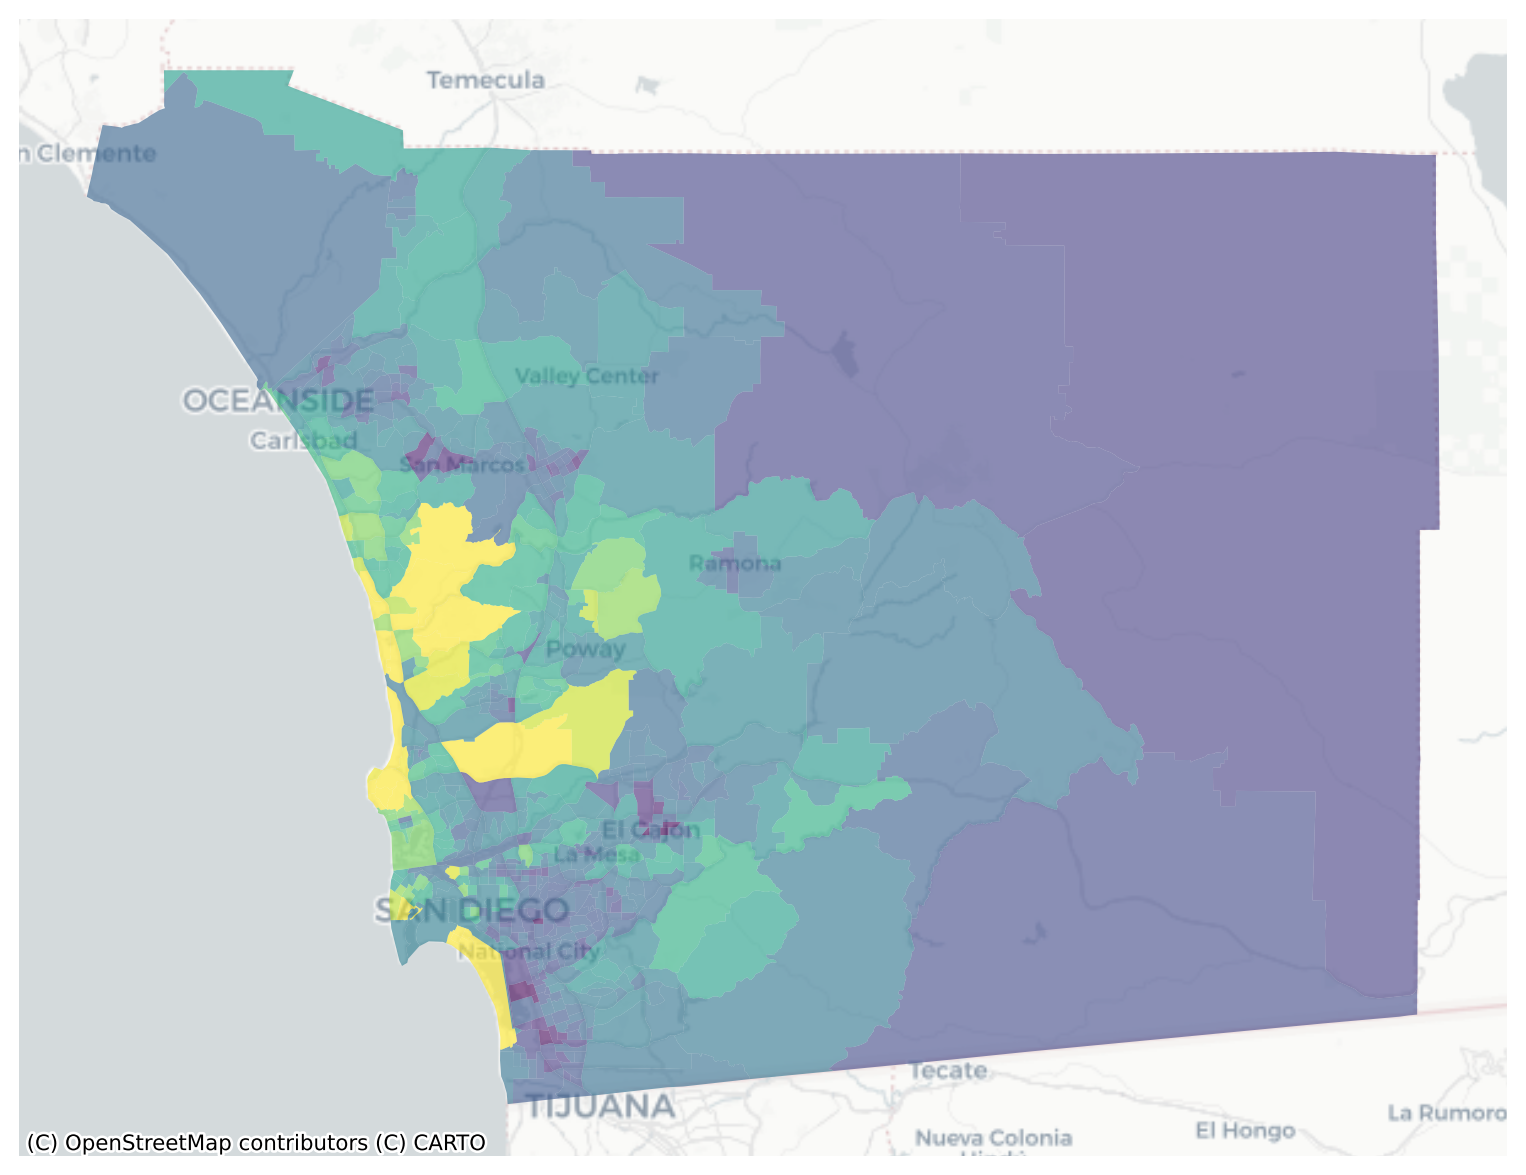

In [9]:
f, ax = plt.subplots(figsize=(10,10))

san_diego.plot('median_home_value', ax=ax, alpha=0.6)
cx.add_basemap(ax, crs=san_diego.crs.to_string(), source=cx.providers.CartoDB.Positron)
ax.axis('off')

<Axes: >

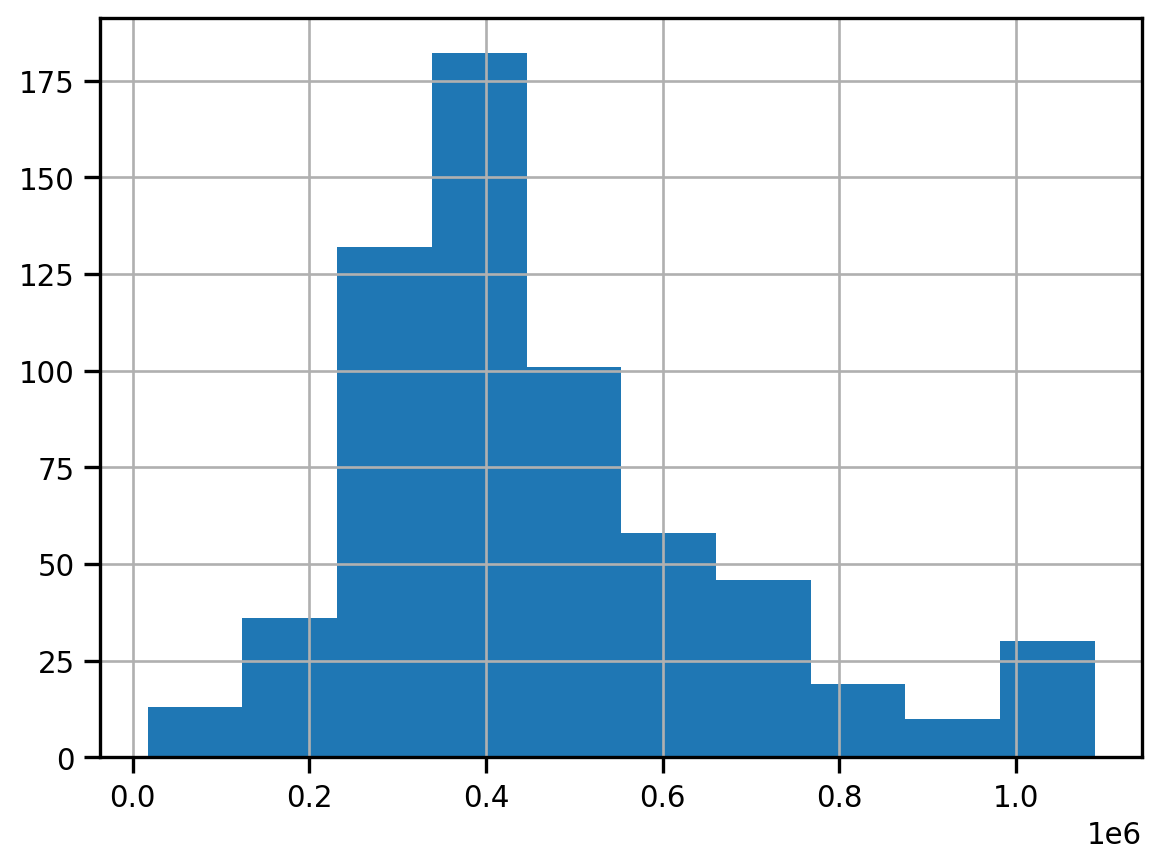

In [10]:
san_diego.median_home_value.hist()

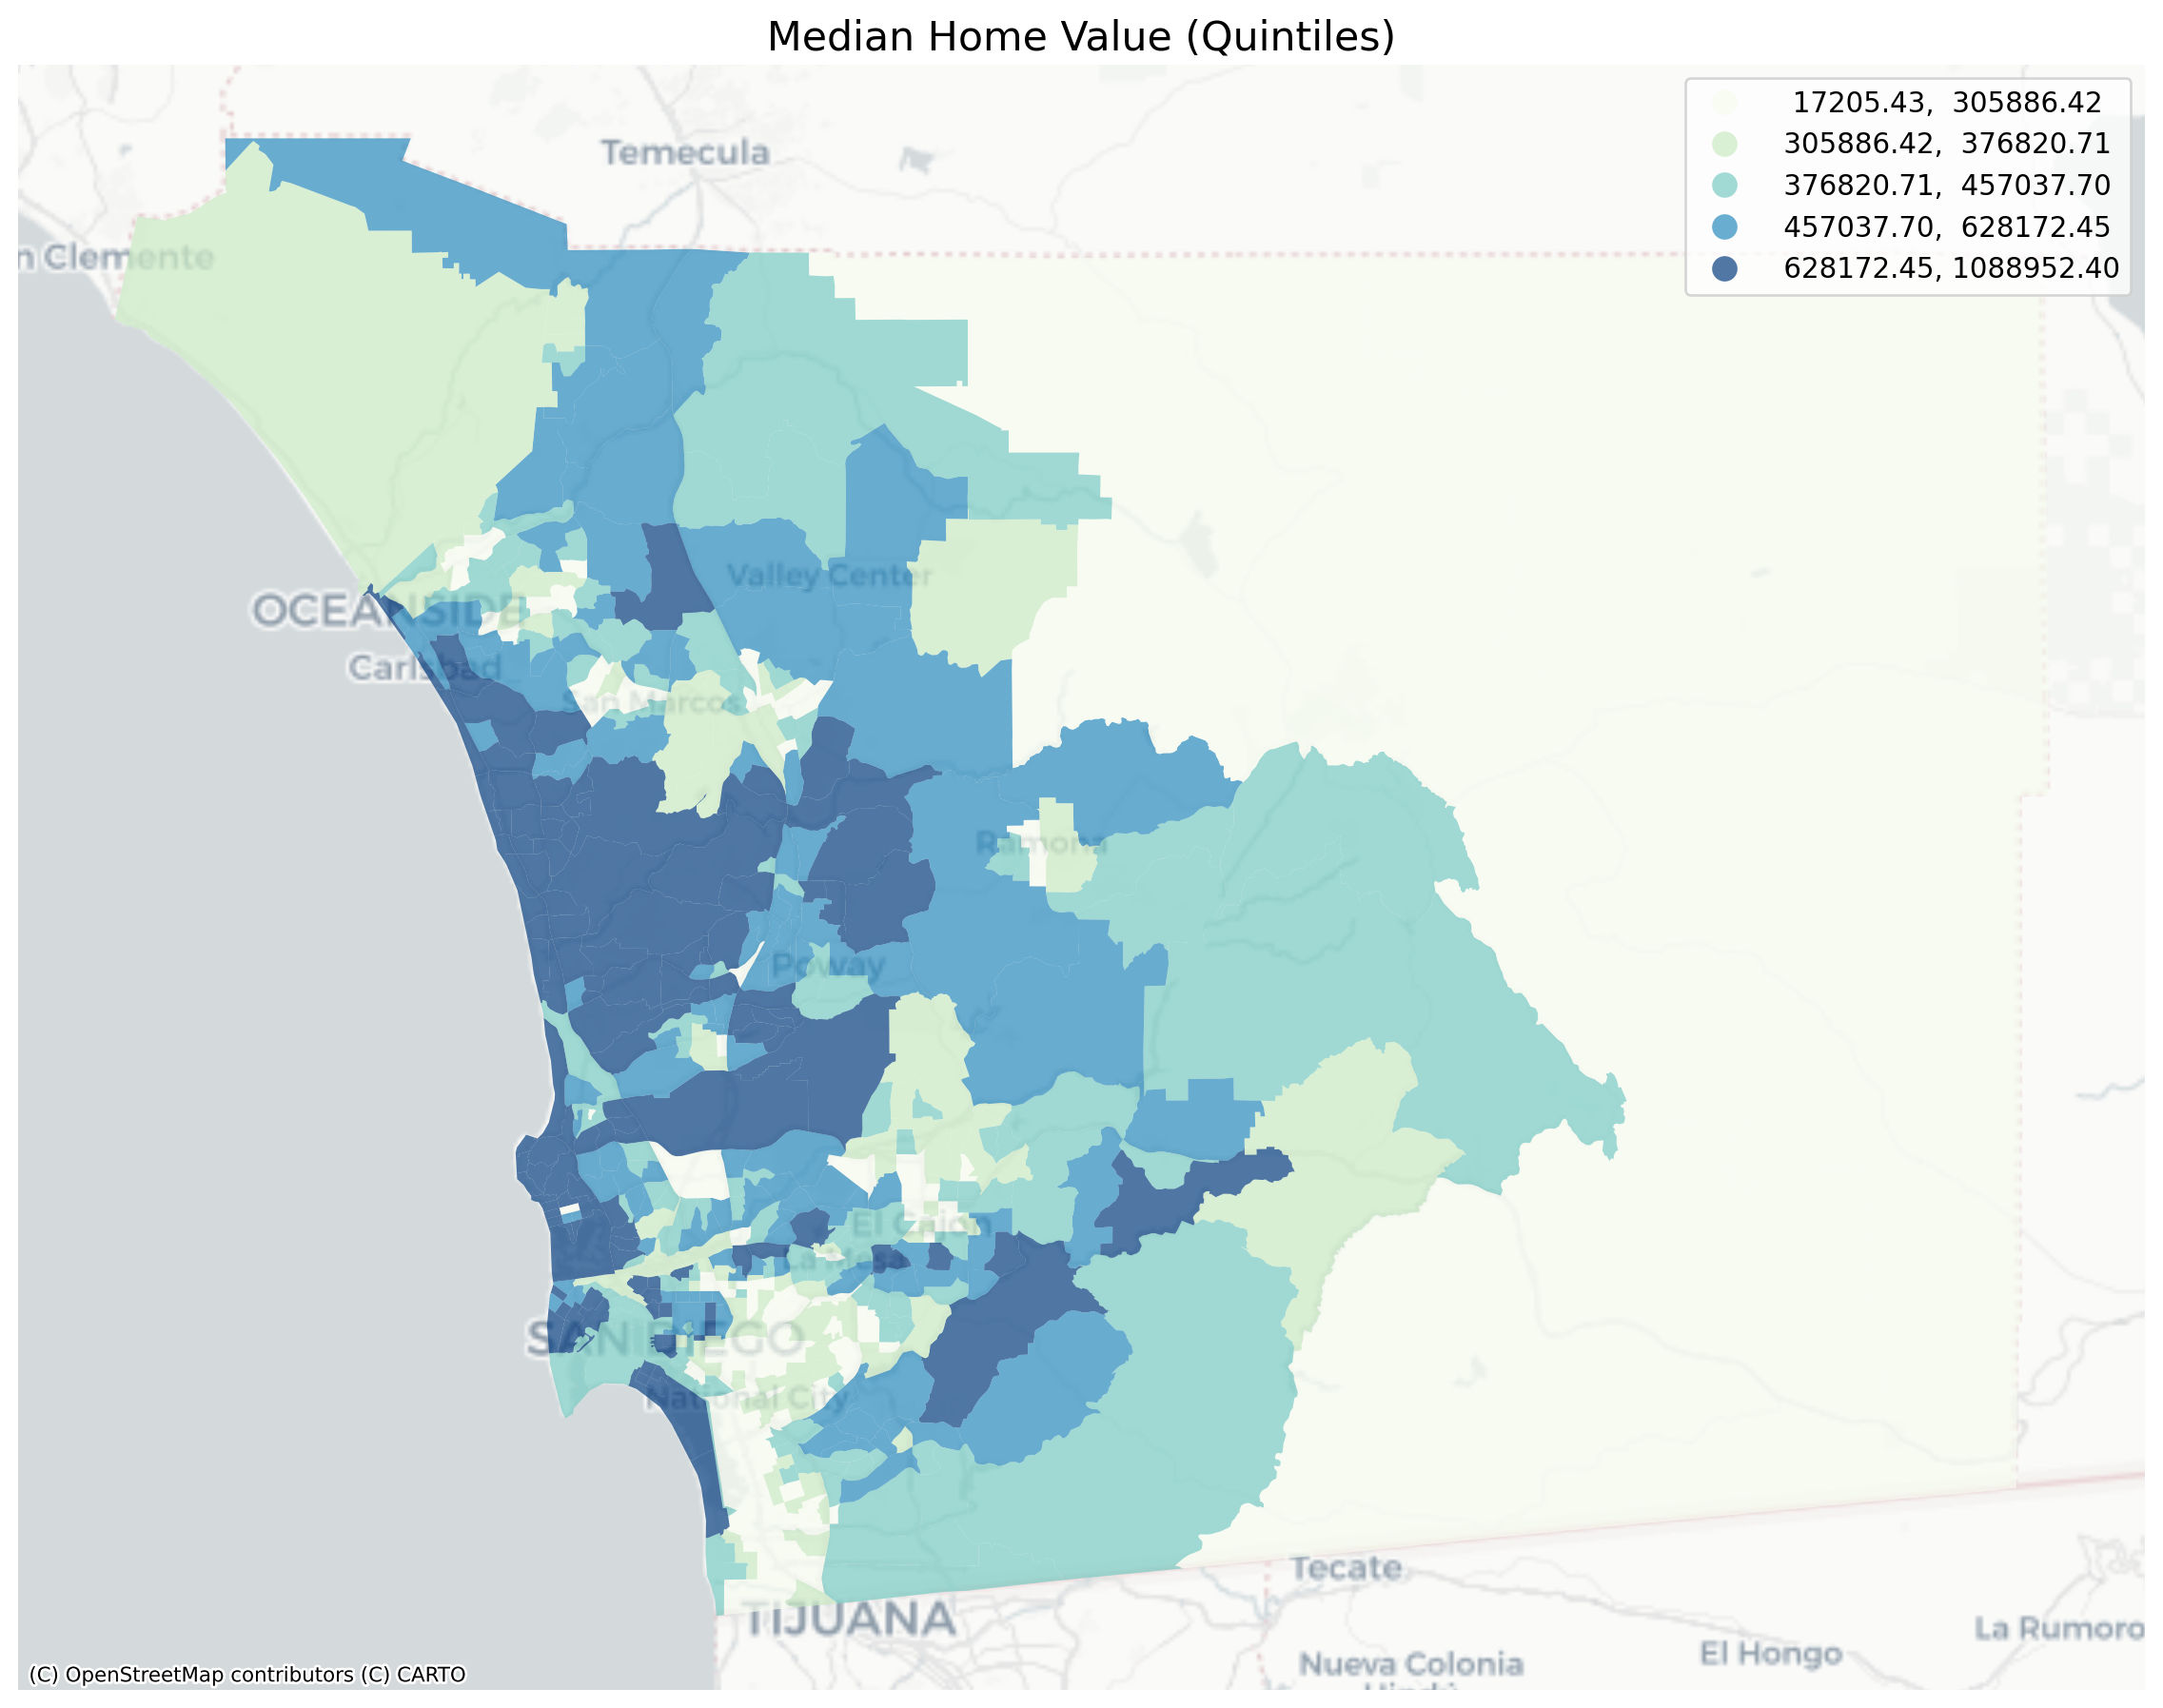

In [11]:
fig, ax = plt.subplots(figsize=(12,12))

san_diego.dropna(subset=['median_home_value']).to_crs(epsg=3857).plot('median_home_value', legend=True, scheme='quantiles', cmap='GnBu', k=5, ax=ax, alpha=0.7)

cx.add_basemap(ax, crs=san_diego.crs.to_string(), source=cx.providers.CartoDB.Positron)
ax.axis('off')

plt.title("Median Home Value (Quintiles)", fontsize=16)

plt.axis('off')
plt.tight_layout()

In [12]:
wq =  lps.weights.Queen.from_dataframe(san_diego)
wq.transform = 'r'

In [13]:
y = san_diego['median_home_value']
ylag = lps.weights.lag_spatial(wq, y)

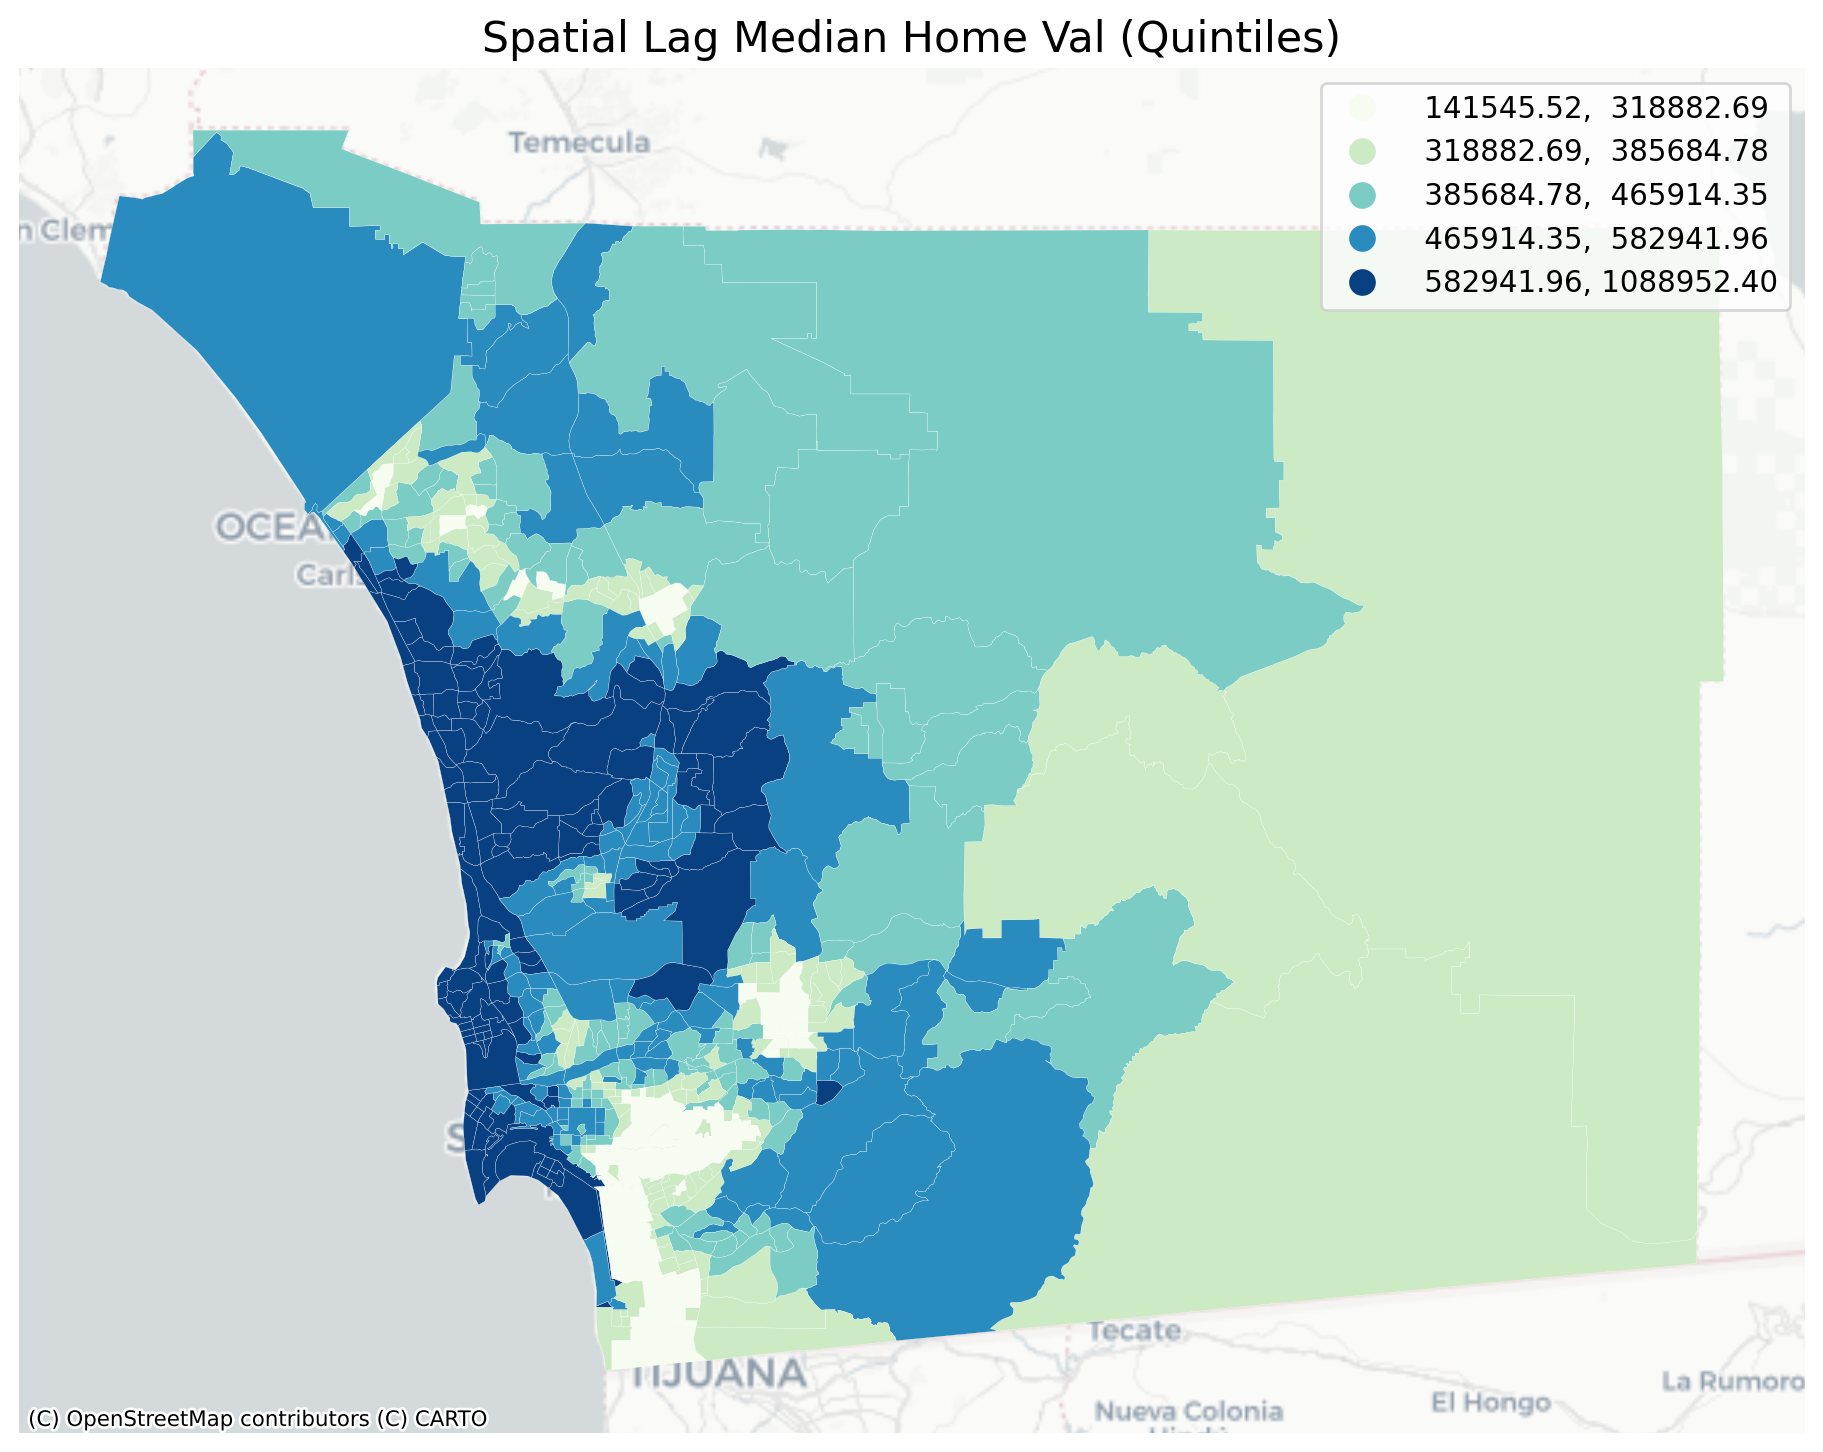

In [14]:
f, ax = plt.subplots(1, figsize=(12, 12))

san_diego.assign(cl=ylag).plot(column='cl', scheme='quantiles', \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)

cx.add_basemap(ax, crs=san_diego.crs.to_string(), source=cx.providers.CartoDB.Positron)
ax.axis('off')

plt.title("Spatial Lag Median Home Val (Quintiles)", fontsize=16)

plt.show()

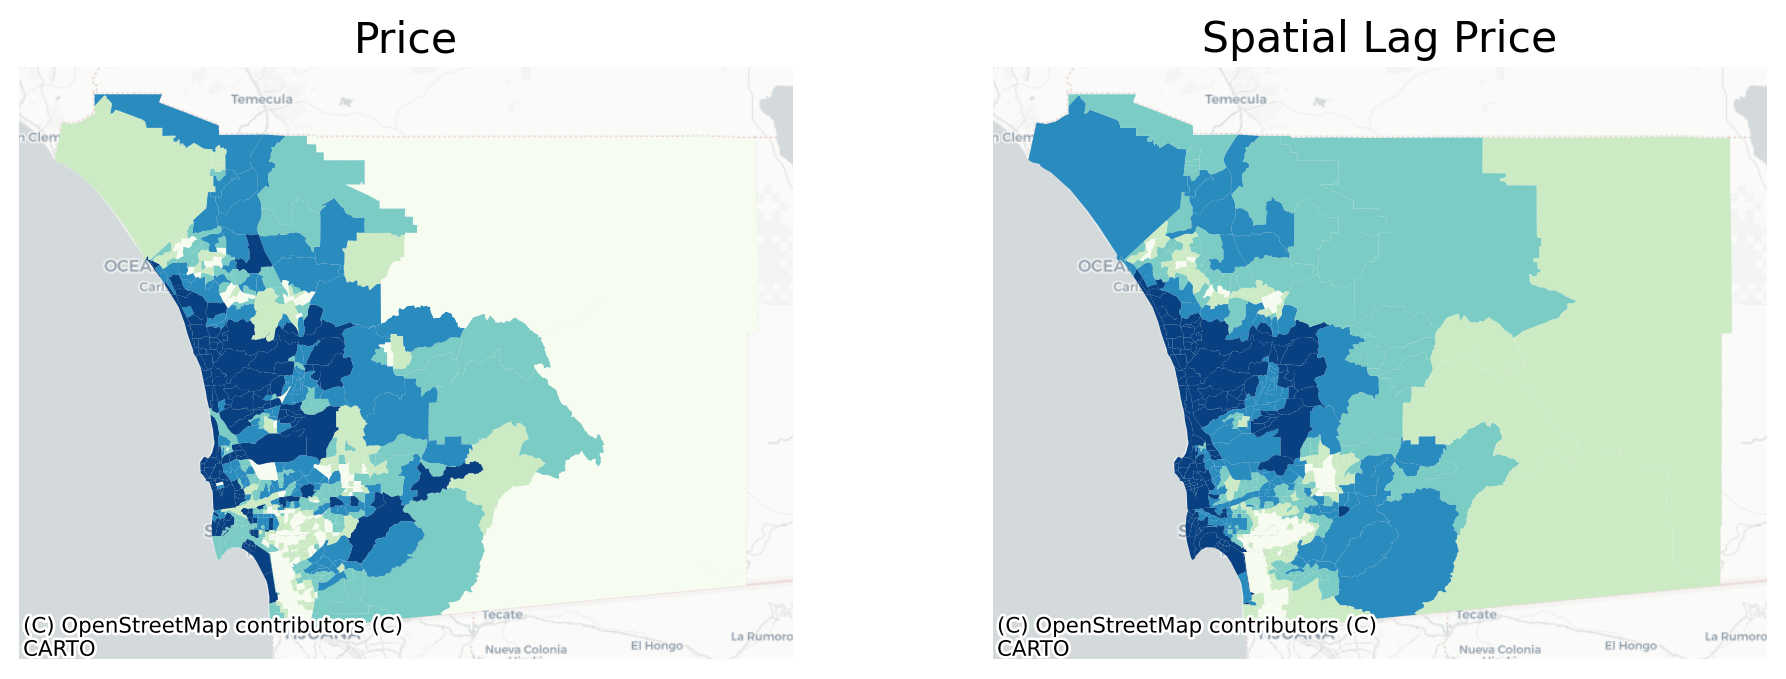

In [15]:
san_diego['lag_median_pri'] = ylag

f,ax = plt.subplots(1,2,figsize=(12,4))

san_diego.plot(column='median_home_value', ax=ax[0],
        scheme="quantiles",  k=5, cmap='GnBu')

#ax[0].axis(san_diego.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Price", fontsize=16)

san_diego.plot(column='lag_median_pri', ax=ax[1],
        scheme='quantiles', cmap='GnBu', k=5)

cx.add_basemap(ax[0], crs=san_diego.crs.to_string(), source=cx.providers.CartoDB.Positron)

cx.add_basemap(ax[1], crs=san_diego.crs.to_string(), source=cx.providers.CartoDB.Positron)

ax[1].set_title("Spatial Lag Price", fontsize=16)
ax[0].axis('off')
ax[1].axis('off')

plt.show()

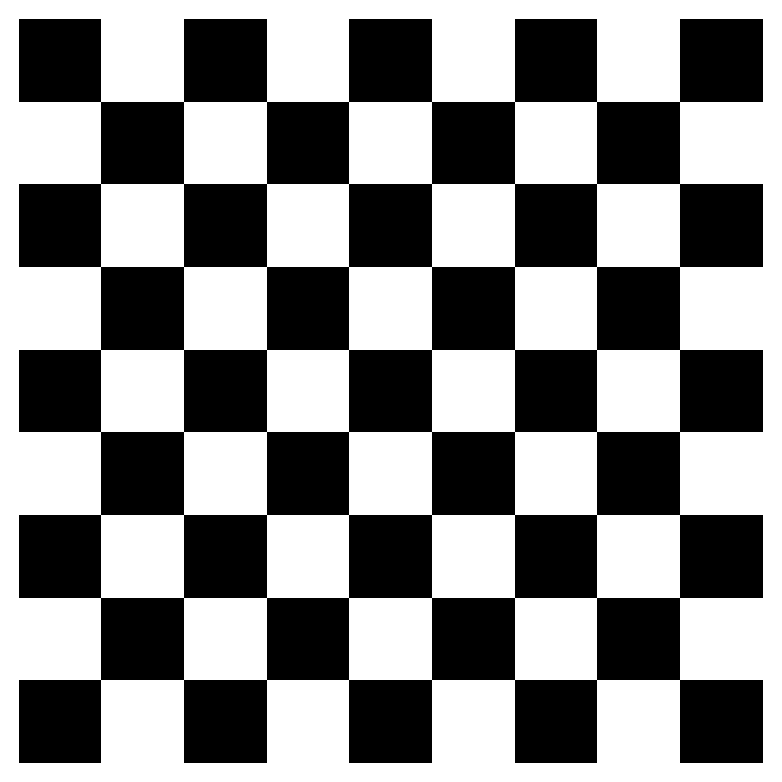

In [16]:
nrows, ncols = 9,9
image = np.zeros(nrows*ncols)

# Set every other cell to 1
image[::2] = 1

# Reshape things into a 9x9 grid.
image = image.reshape((nrows, ncols))
plt.matshow(image, cmap='Greys')
plt.axis('off')
plt.show()

In [17]:
y.median()

405416.57303370786

In [18]:
san_diego.shape

(627, 195)

In [19]:
yb = y > y.median()
sum(yb)

313

In [20]:
yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb] 
san_diego['yb'] = yb

<Axes: >

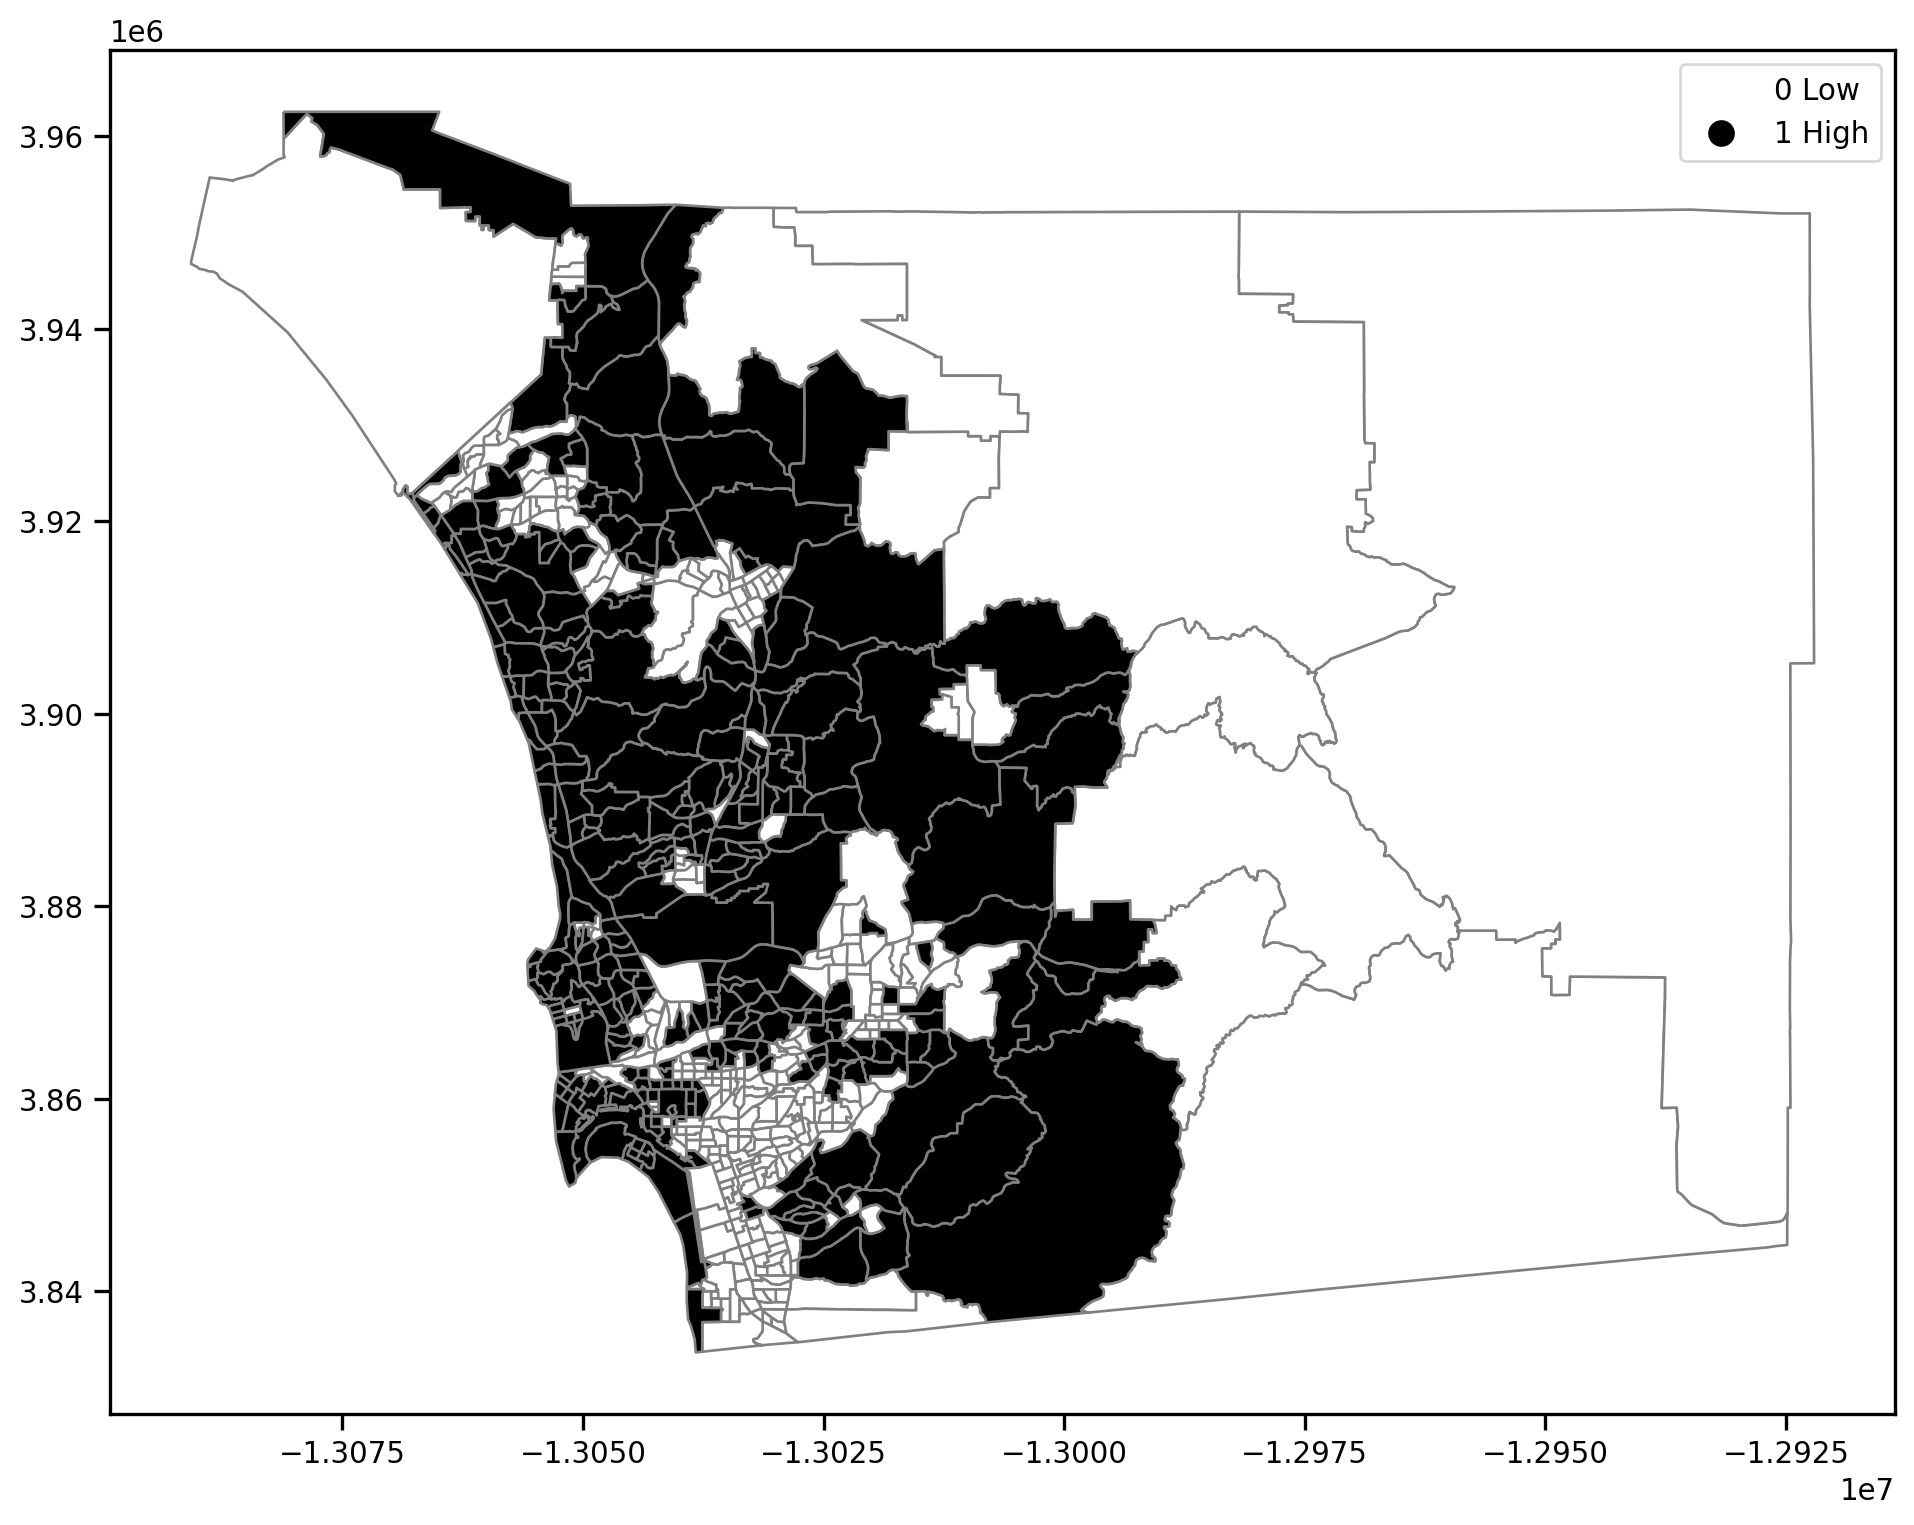

In [21]:
fig, ax = plt.subplots(figsize=(12,12))
san_diego.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

In [22]:
yb = 1 * (y > y.median()) # convert back to binary
wq =  lps.weights.Queen.from_dataframe(san_diego)
wq.transform = 'b'
np.random.seed(12345)
jc = esda.join_counts.Join_Counts(yb, wq)

In [23]:
jc.bb

754.0

In [24]:
jc.ww

745.0

In [25]:
jc.bw

475.0

In [26]:
jc.bb + jc.ww + jc.bw

1974.0

In [27]:
wq.s0 / 2

1974.0

In [28]:
jc.bb

754.0

In [29]:
jc.mean_bb

490.03103103103103

Text(0.5, 0, 'BB Counts')

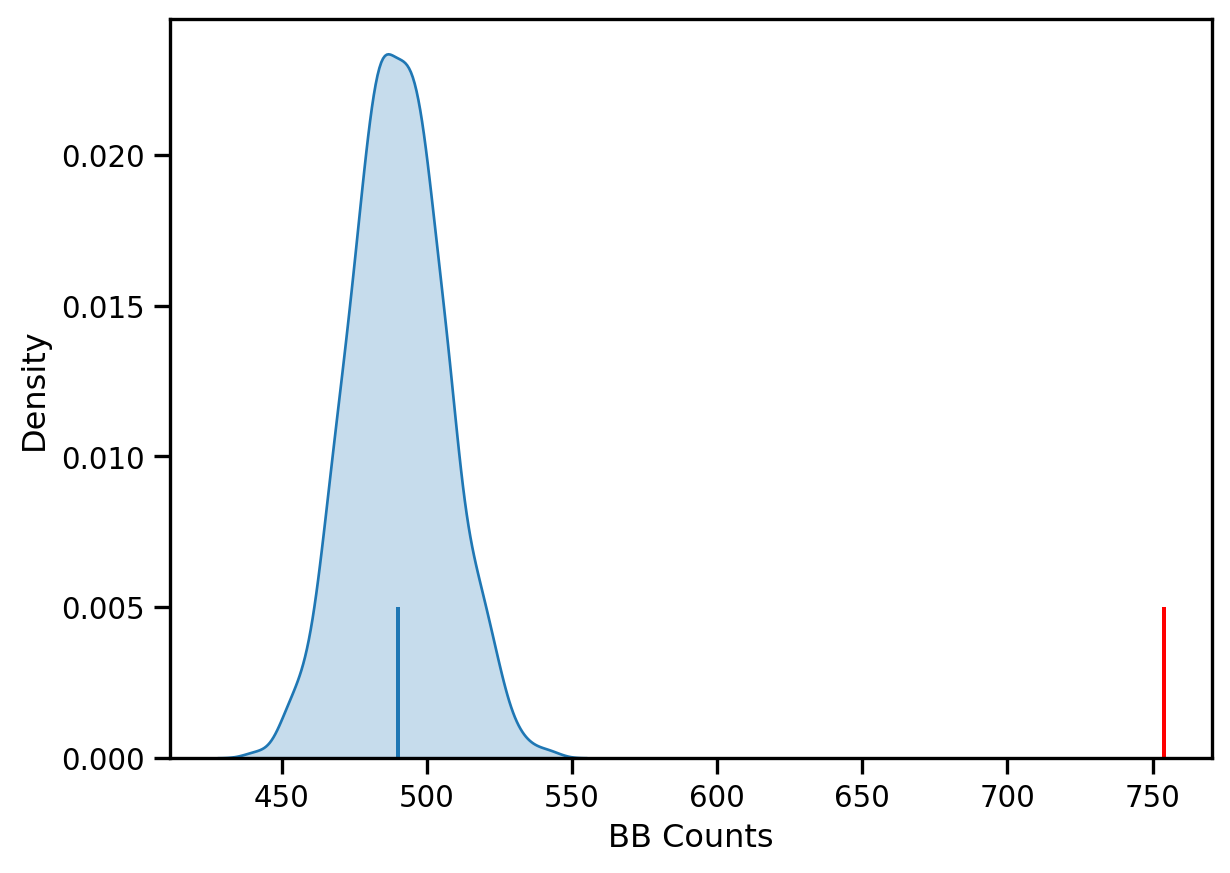

In [30]:
import seaborn as sbn
sbn.kdeplot(jc.sim_bb, shade=True)
plt.vlines(jc.bb, 0, 0.005, color='r')
plt.vlines(jc.mean_bb, 0,0.005)
plt.xlabel('BB Counts')

In [31]:
jc.p_sim_bb

0.001

In [32]:
wq.transform = 'r'

In [33]:
y = san_diego['median_home_value']

In [34]:
np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I

0.660917168991019

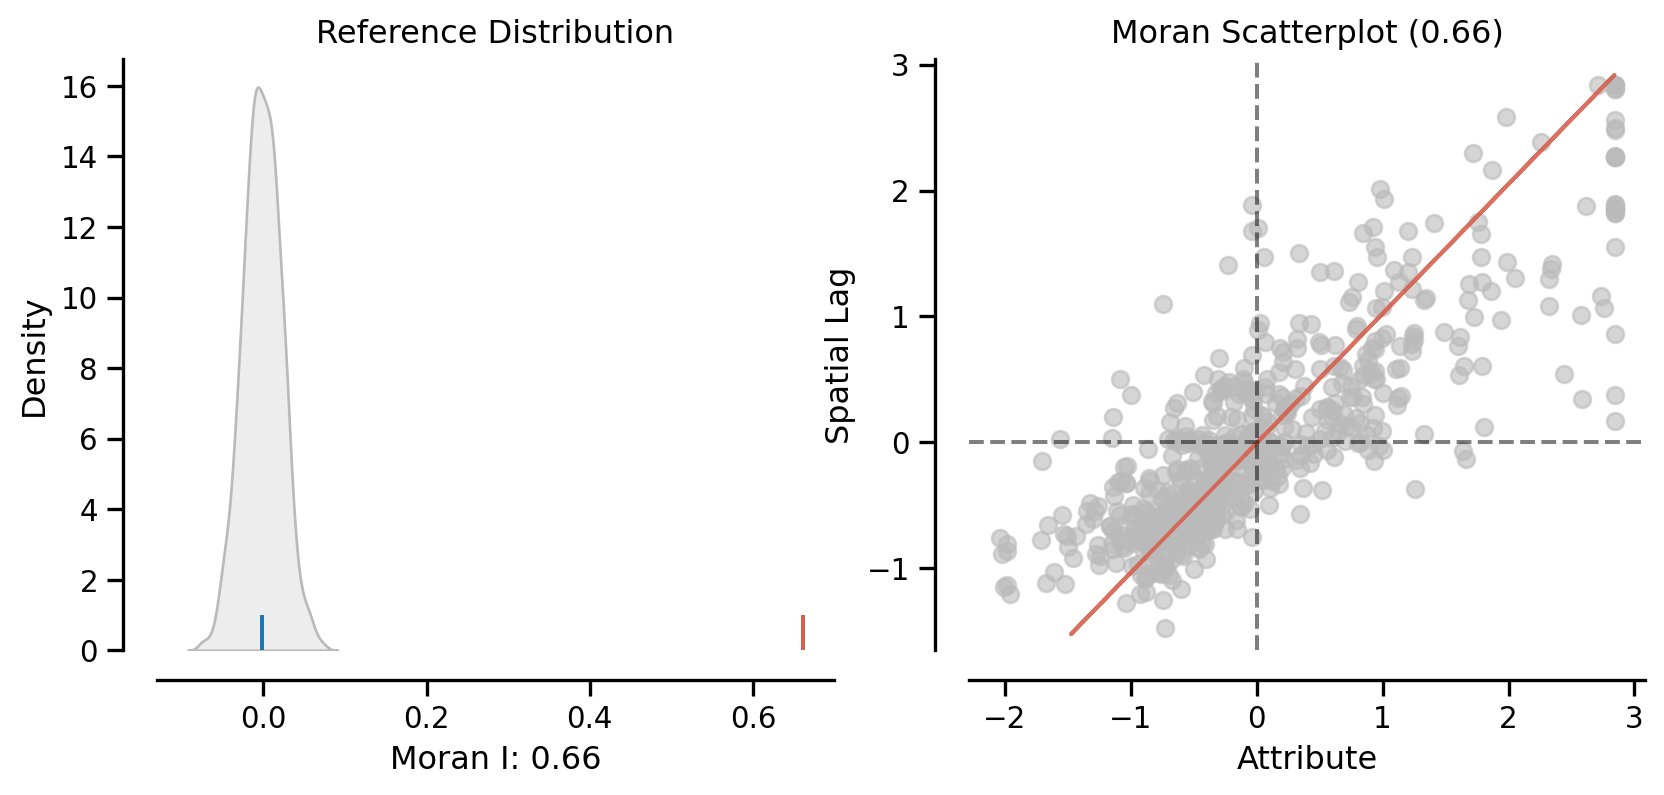

In [35]:
from splot.esda import plot_moran
plot_moran(mi, zstandard=True, figsize=(10,4))
plt.show()

In [36]:
mi.p_sim

0.001

In [37]:
mi.p_sim

0.001

In [38]:
np.random.seed(12345)

In [39]:
wq.transform = 'r'
lag_price = lps.weights.lag_spatial(wq, san_diego['median_home_value'])

In [40]:
li = esda.moran.Moran_Local(y, wq)

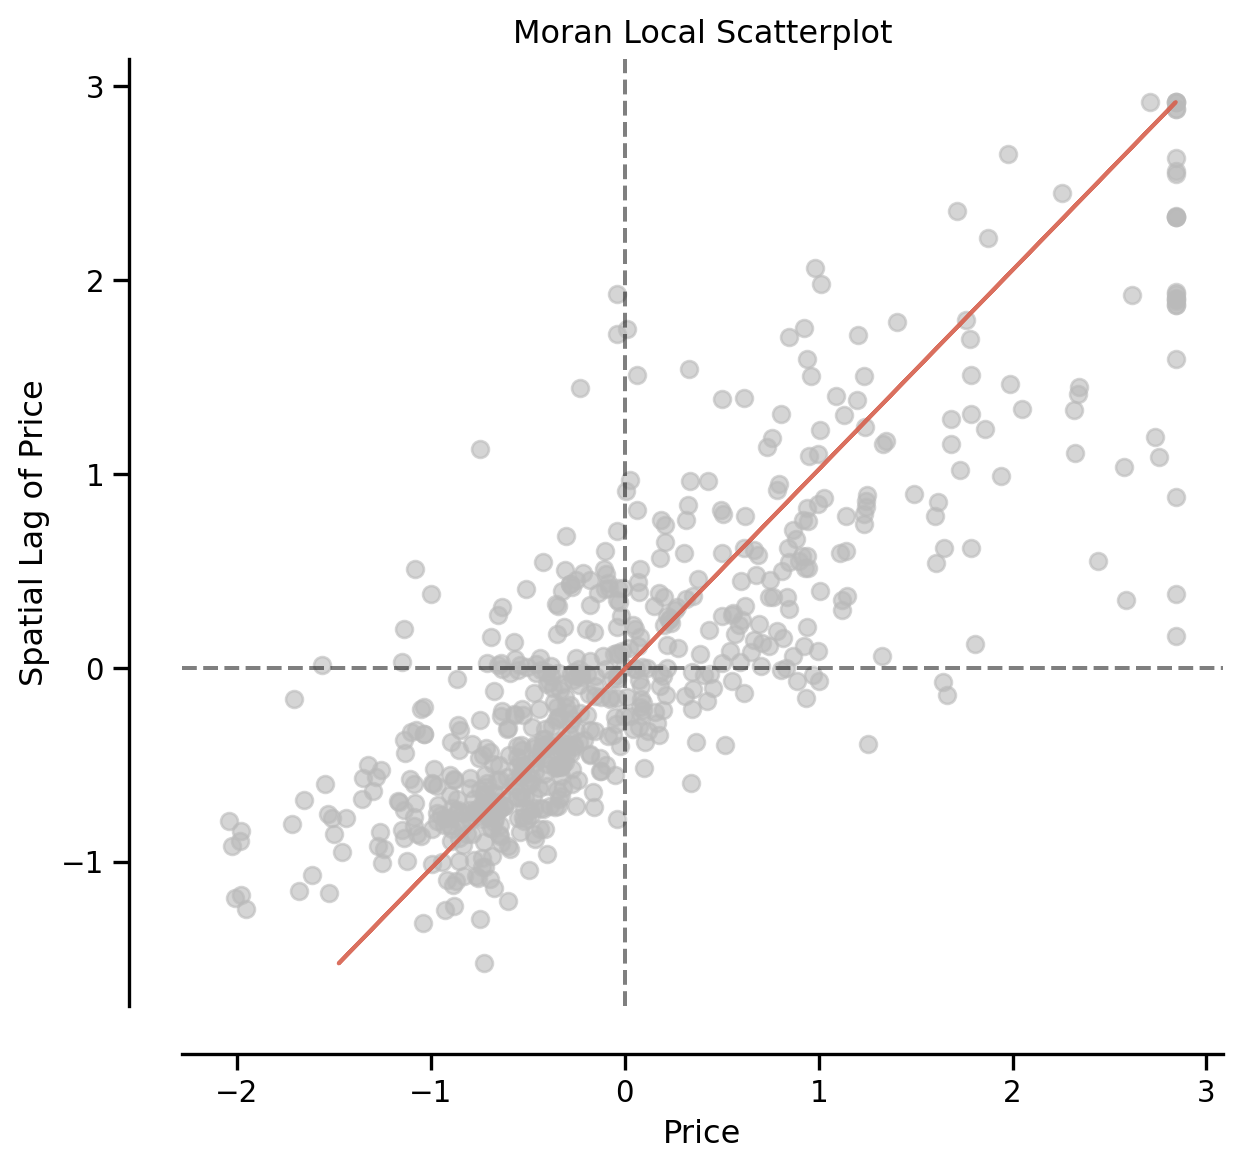

In [41]:
from splot.esda import moran_scatterplot

fig, ax = moran_scatterplot(li)
ax.set_xlabel('Price')
ax.set_ylabel('Spatial Lag of Price')
plt.show()

In [42]:
(li.p_sim < 0.05).sum()

246

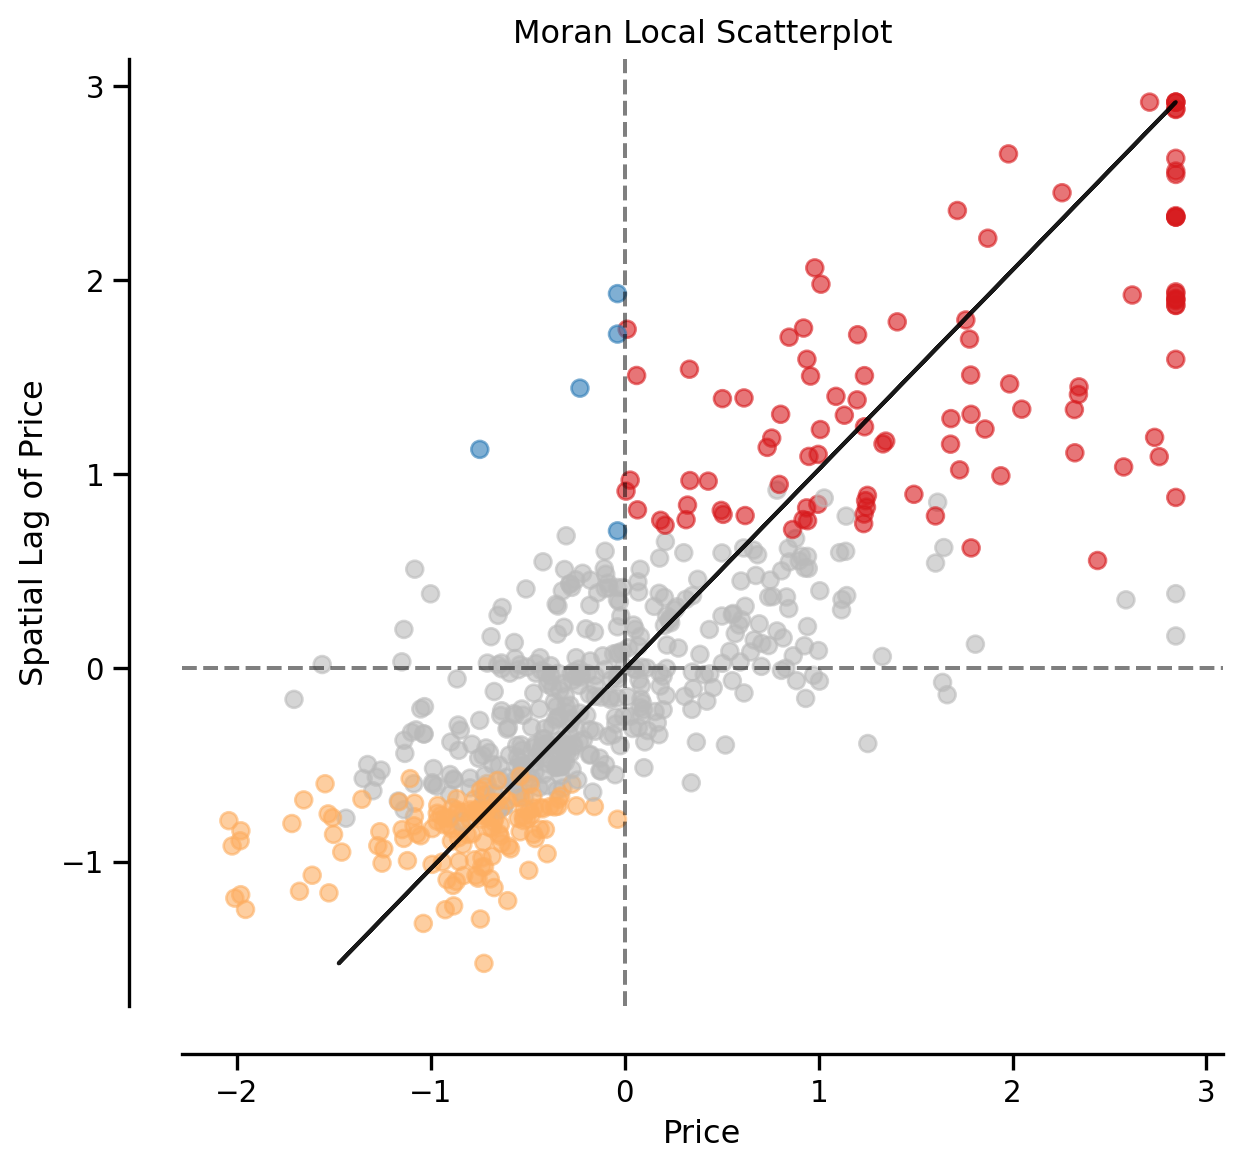

In [43]:
fig, ax = moran_scatterplot(li, p=0.05)
ax.set_xlabel('Price')
ax.set_ylabel('Spatial Lag of Price')
plt.show()

In [44]:
li.q

array([4, 1, 2, 3, 3, 3, 3, 4, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 2, 2, 1, 1, 2, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 2, 1, 1, 1,
       3, 1, 3, 3, 4, 3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 2,
       2, 1, 2, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1,
       3, 3, 2, 2, 2, 1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 2,
       2, 4, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 3, 3, 1, 1, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 3, 3, 2, 3, 4, 4, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 2, 1, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 4, 1, 3, 3, 1, 2, 4, 3, 3, 3, 3, 3, 3, 1, 2, 3, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 4, 3, 3, 1, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 2, 1, 1, 1, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 4,
       1, 1, 1, 1, 3, 1, 3, 4, 4, 4, 3, 2, 1, 1, 2,

In [45]:
hotspot = (li.p_sim < 0.05) * (li.q==1)
print(f"There are {hotspot.sum()} hot spots")

There are 98 hot spots


In [46]:
coldspot = (li.p_sim < 0.05) * (li.q==3)
print(f"There are {coldspot.sum()} cold spots")

There are 143 cold spots


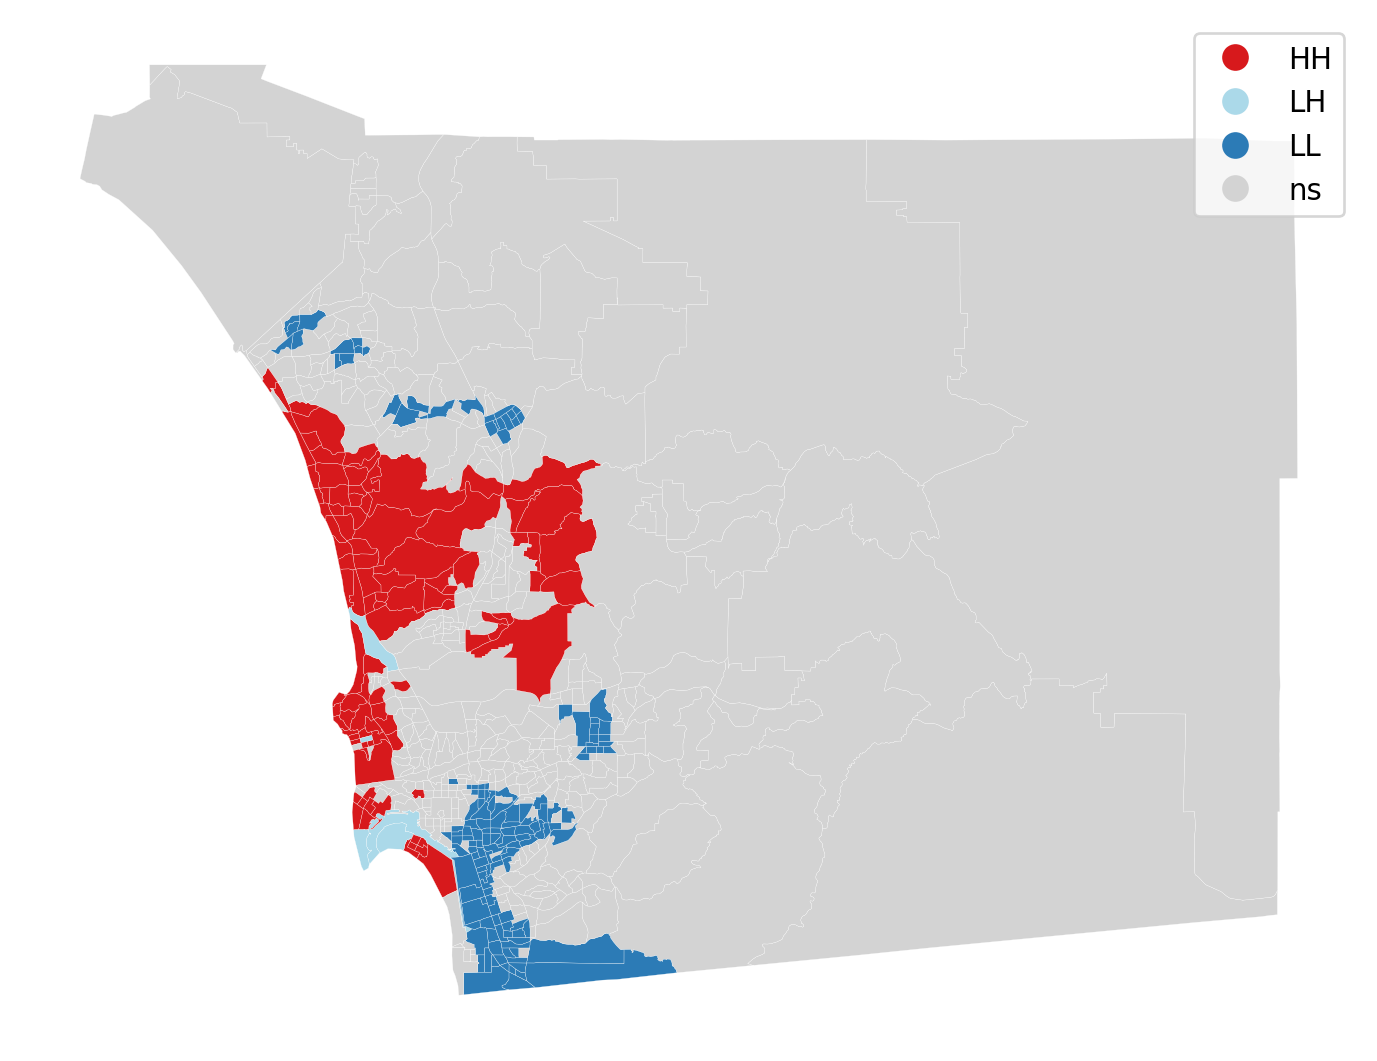

In [47]:
from splot.esda import lisa_cluster
lisa_cluster(li, san_diego, p=0.05, figsize = (9,9))
plt.show()

(<Figure size 1440x384 with 3 Axes>,
 array([<Axes: title={'center': 'Moran Local Scatterplot'}, xlabel='Attribute', ylabel='Spatial Lag'>,
        <Axes: >, <Axes: >], dtype=object))

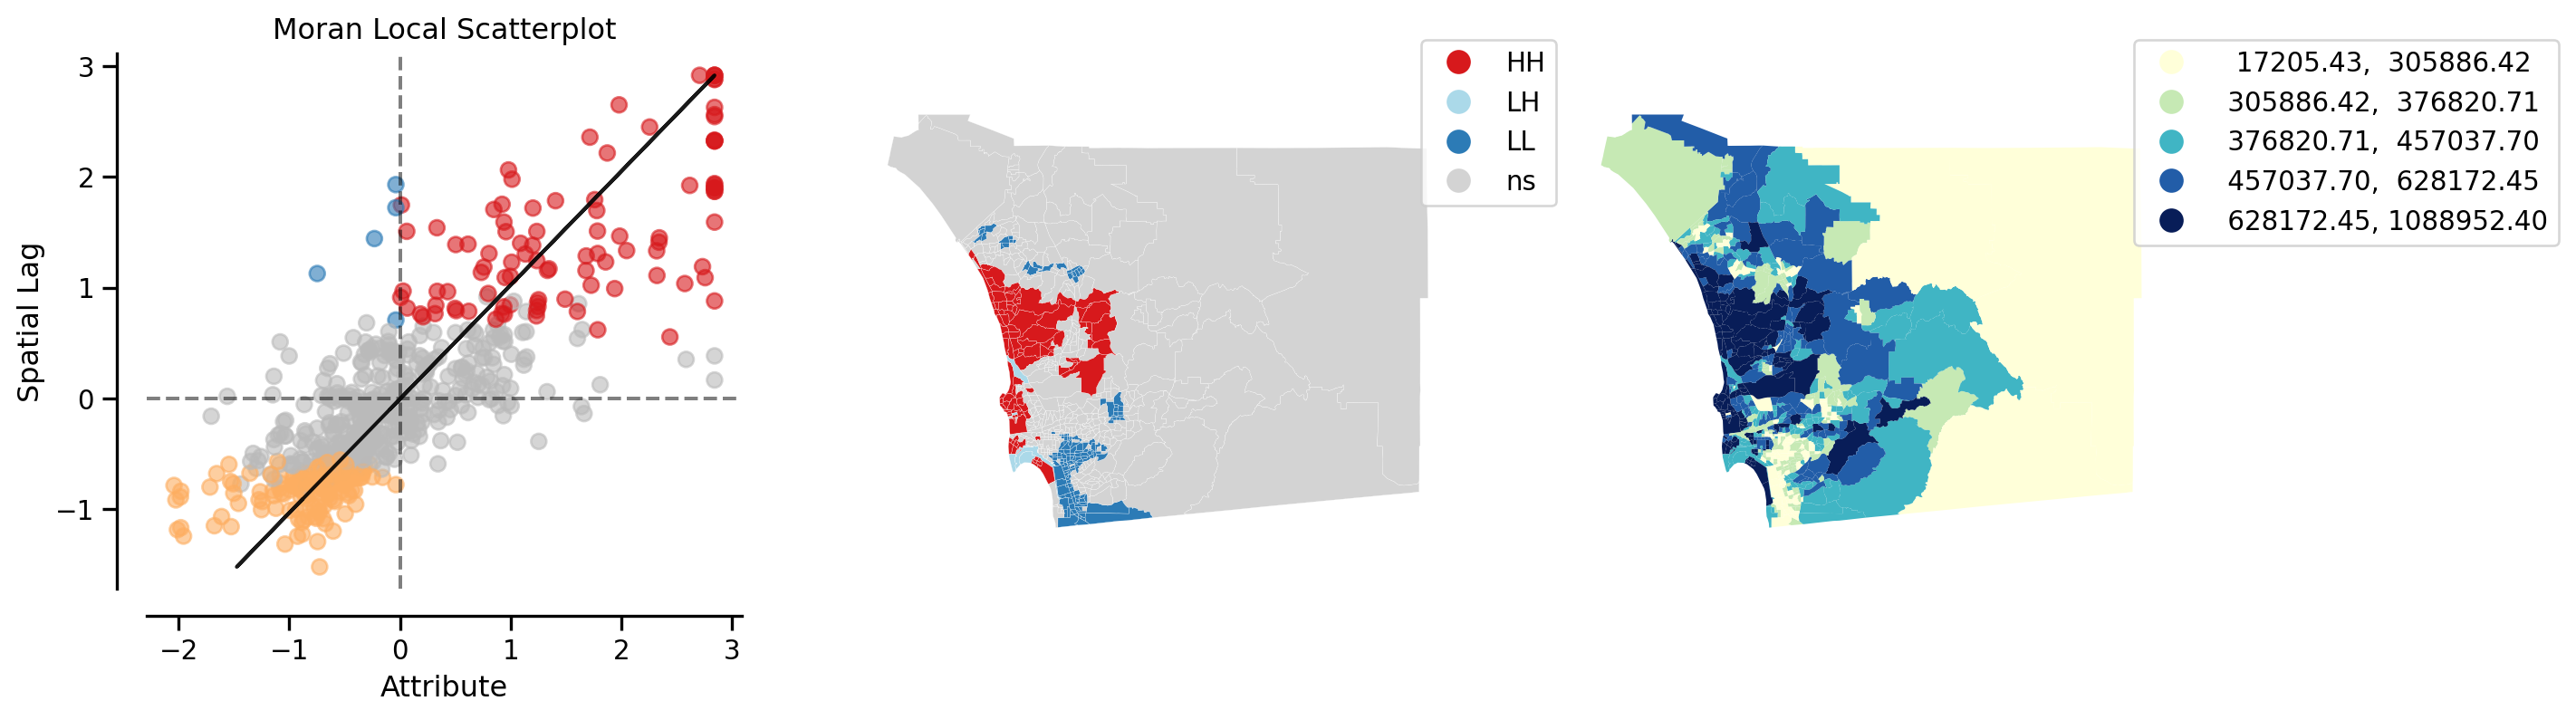

In [48]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(li, san_diego, 'median_home_value')

In [49]:
li.Is.shape

(627,)

In [50]:
dir(li)

['EI',
 'EI_sim',
 'EIc',
 'Is',
 'VI',
 'VI_sim',
 'VIc',
 '_Moran_Local__calc',
 '_Moran_Local__moments',
 '_Moran_Local__quads',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_statistic',
 'by_col',
 'den',
 'explore',
 'geoda_quads',
 'get_cluster_labels',
 'n',
 'n_1',
 'p_sim',
 'p_z_sim',
 'permutations',
 'q',
 'quads',
 'rlisas',
 'seI_sim',
 'sim',
 'w',
 'y',
 'z',
 'z_sim']

In [51]:
np.random.seed(12345)

In [52]:
li = esda.moran.Moran_Local(y, wq, keep_simulations=True)

In [53]:
sig = np.where(li.p_sim<0.05)

In [54]:
dir(li)

['EI',
 'EI_sim',
 'EIc',
 'Is',
 'VI',
 'VI_sim',
 'VIc',
 '_Moran_Local__calc',
 '_Moran_Local__moments',
 '_Moran_Local__quads',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_statistic',
 'by_col',
 'den',
 'explore',
 'geoda_quads',
 'get_cluster_labels',
 'n',
 'n_1',
 'p_sim',
 'p_z_sim',
 'permutations',
 'q',
 'quads',
 'rlisas',
 'seI_sim',
 'sim',
 'w',
 'y',
 'z',
 'z_sim']

In [55]:
li.rlisas.shape

(627, 999)

In [56]:
li.rlisas[sig[0][-1],:]

array([ 3.42798494e-01, -4.45389092e-02,  6.44999365e-01,  1.01595189e-01,
        5.57418460e-02, -9.65445924e-02, -5.18269142e-01, -1.46339409e-01,
        7.45014339e-01,  1.78287038e-02,  4.44180655e-01, -3.04512933e-01,
       -3.15555070e-01, -1.76574745e-01,  1.14373127e-01,  3.18195714e-04,
        1.73582307e-01,  5.62915572e-01, -2.63419473e-02,  3.00282170e-02,
        5.59182100e-01, -1.74789220e-01,  1.55283563e-01, -3.12980257e-01,
        2.44676548e-01, -1.70737909e-01,  5.17219982e-01, -4.43597899e-01,
       -1.74552329e-02,  1.29990607e-01, -8.35037335e-02, -3.71612590e-01,
       -4.82192709e-02,  4.67159910e-01, -6.86726804e-02, -2.59765665e-01,
        1.54093090e-02, -1.90459810e-01,  1.67164711e-01,  2.80294950e-02,
        6.73604594e-01, -8.76417696e-01,  1.27280453e-02, -8.95977933e-01,
        1.12422846e-01, -6.19964999e-01, -8.18470009e-01, -8.77104622e-02,
        6.84672003e-02, -5.20740069e-01,  2.41837006e-01,  2.38471623e-01,
       -1.70214403e-01, -

In [57]:
sig[0][-1]

626

In [58]:
li.Is[626]

1.1256660313590514

In [59]:
observed = li.Is[626]
null = li.rlisas[626,:]

In [60]:
(null >= observed).sum()

0

In [61]:
li.p_sim[626]

0.001

Text(0.5, 0, 'Local I for tract 626')

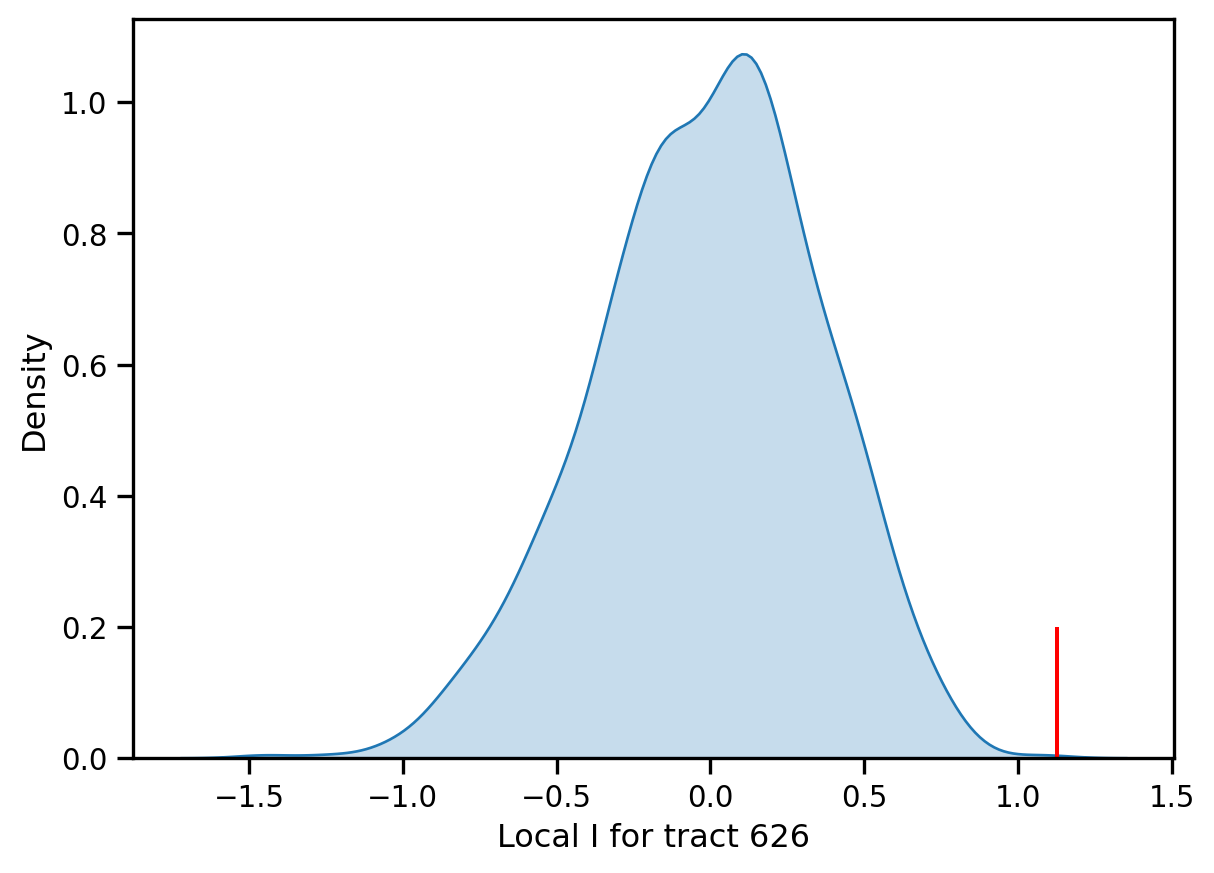

In [62]:
import seaborn as sbn
sbn.kdeplot(null, shade=True)
plt.vlines(observed,0, 0.2, color='r')
plt.xlabel("Local I for tract 626")

In [63]:
nsig = np.where(li.p_sim > 0.05)

In [64]:
nsig[0][0]

0

In [65]:
observed = li.Is[0]
null = li.rlisas[0,:]

Text(0.5, 0, 'Local I for tract 0')

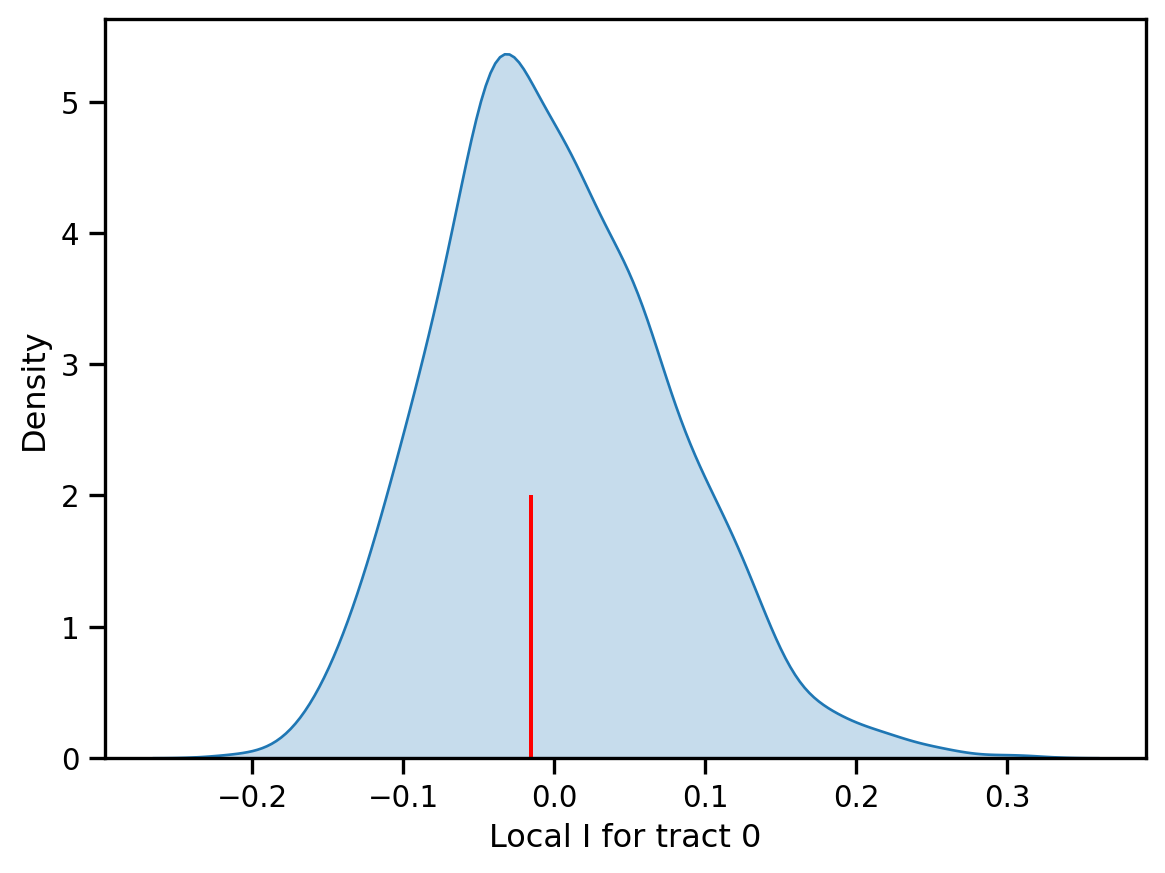

In [66]:
import seaborn as sbn
sbn.kdeplot(null, shade=True)
plt.vlines(observed,0, 2.0, color='r')
plt.xlabel("Local I for tract 0")

In [67]:
li.p_sim[0]

0.46